In [112]:
import pandas as pd

file_url = 'https://raw.githubusercontent.com/ajayt0m/Forecasting_Crop_Prices_Maharashtra/main/Monthly_data_cmo.csv'

crop_df = pd.read_csv(file_url, parse_dates=["date"])

In [113]:
crop_df

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name
0,Ahmednagar,Bajri,2015,April,79,1406,1538,1463,2015-04-01,Ahmadnagar,Maharashtra
1,Ahmednagar,Bajri,2016,April,106,1788,1925,1875,2016-04-01,Ahmadnagar,Maharashtra
2,Ahmednagar,Wheat(Husked),2015,April,1253,1572,1890,1731,2015-04-01,Ahmadnagar,Maharashtra
3,Ahmednagar,Wheat(Husked),2016,April,387,1750,2220,1999,2016-04-01,Ahmadnagar,Maharashtra
4,Ahmednagar,Sorgum(Jawar),2015,April,3825,1600,2200,1900,2015-04-01,Ahmadnagar,Maharashtra
...,...,...,...,...,...,...,...,...,...,...,...
62424,Shrigonda,GRAM,2016,November,586,5700,6367,6200,2016-11-01,Ahmadnagar,Maharashtra
62425,Shrigonda,GREEN GRAM,2016,November,2,5000,5000,5000,2016-11-01,Ahmadnagar,Maharashtra
62426,Shrigonda,BLACK GRAM,2016,November,46,4700,6933,6400,2016-11-01,Ahmadnagar,Maharashtra
62427,Shrigonda,SOYBEAN,2016,November,166,2583,2708,2633,2016-11-01,Ahmadnagar,Maharashtra


In [114]:
crop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62429 entries, 0 to 62428
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   APMC             62429 non-null  object        
 1   Commodity        62429 non-null  object        
 2   Year             62429 non-null  int64         
 3   Month            62429 non-null  object        
 4   arrivals_in_qtl  62429 non-null  int64         
 5   min_price        62429 non-null  int64         
 6   max_price        62429 non-null  int64         
 7   modal_price      62429 non-null  int64         
 8   date             62429 non-null  datetime64[ns]
 9   district_name    62429 non-null  object        
 10  state_name       62429 non-null  object        
dtypes: datetime64[ns](1), int64(5), object(5)
memory usage: 5.2+ MB


In [115]:
# Convert all 'Commodity' values to lowercase
crop_df['Commodity'] = crop_df['Commodity'].str.lower()

In [116]:
with pd.option_context("display.max_columns", None, "display.max_rows", None):
    display(crop_df['Commodity'].value_counts())

gram                     4115
wheat(husked)            4097
soybean                  3727
sorgum(jawar)            3716
pigeon pea (tur)         3477
maize                    2546
green gram               2425
bajri                    2346
onion                    1872
black gram               1675
ground nut pods (dry)    1068
cotton                   1063
tomato                   1021
brinjal                  1008
ladies finger             921
paddy-unhusked            911
cabbage                   893
green chilli              844
cucumber                  835
flower                    824
bitter gourd              822
potato                    718
cluster bean              701
rice(paddy-hus)           669
capsicum                  656
bottle gourd              596
garlic                    580
pomegranate               565
sesamum                   544
ginger (fresh)            518
sunflower                 503
chillies(red)             501
carrot                    479
coriander 

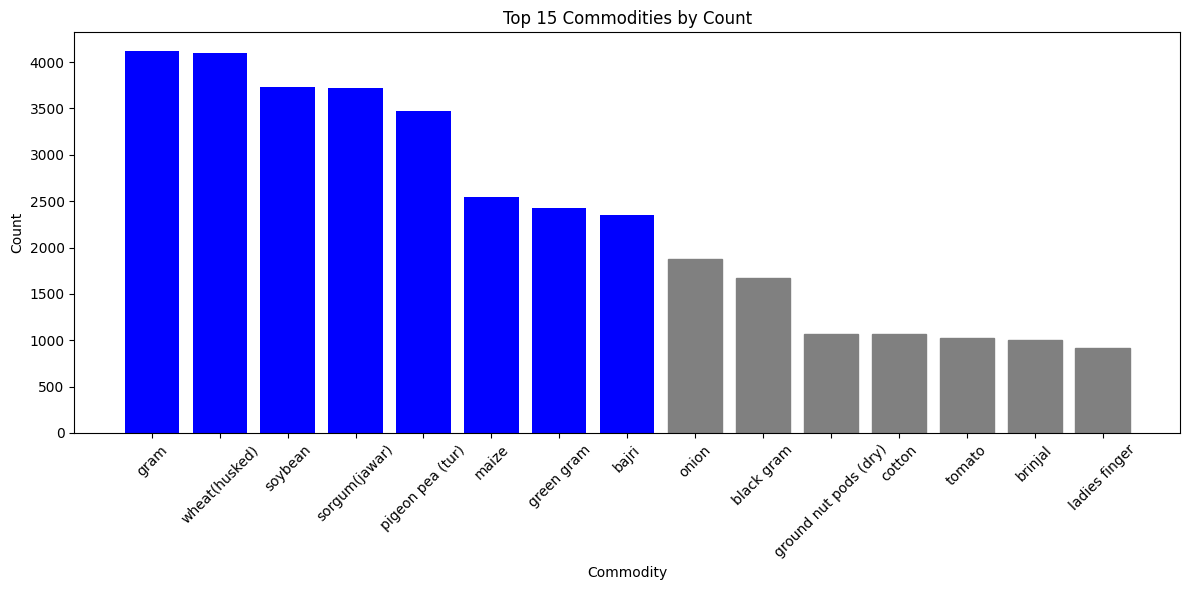

In [117]:
import matplotlib.pyplot as plt

# Calculate the count of each commodity
commodity_counts = crop_df['Commodity'].value_counts()

# Extract the top 15 commodities by count
top_15_commodities = commodity_counts.head(15)

# Extract commodity names and their counts
commodities = top_15_commodities.index
counts = top_15_commodities.values

# Determine the number of bars to make grey
num_bars_to_make_grey = 7

# Create a list of colors, making the last 7 bars grey
colors = ['grey' if i >= (len(commodities) - num_bars_to_make_grey) else 'blue' for i in range(len(commodities))]

# Create a bar chart with custom colors
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
bars = plt.bar(commodities, counts, color=colors)

# Customize the chart
plt.xlabel('Commodity')
plt.ylabel('Count')
plt.title('Top 15 Commodities by Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Customize the color of the last 7 bars
for i in range(len(commodities) - num_bars_to_make_grey, len(commodities)):
    bars[i].set_color('grey')

# Show the chart
plt.tight_layout()  # Ensure labels fit in the figure
plt.show()


# 2. Creating a new column 'Total Value'

In [118]:
# Create a new column 'Total Value' by multiplying 'arrivals_in_qtl' and 'modal_price'
crop_df['Total Value'] = crop_df['arrivals_in_qtl'] * crop_df['modal_price']

In [119]:
# Group by 'Commodity' and aggregate by sum of 'Total Value'
commodity_grouped = crop_df.groupby('Commodity')['Total Value'].sum().reset_index()

# Rename the aggregated column
commodity_grouped.rename(columns={'Total Value': 'Total Value Sum'}, inplace=True)

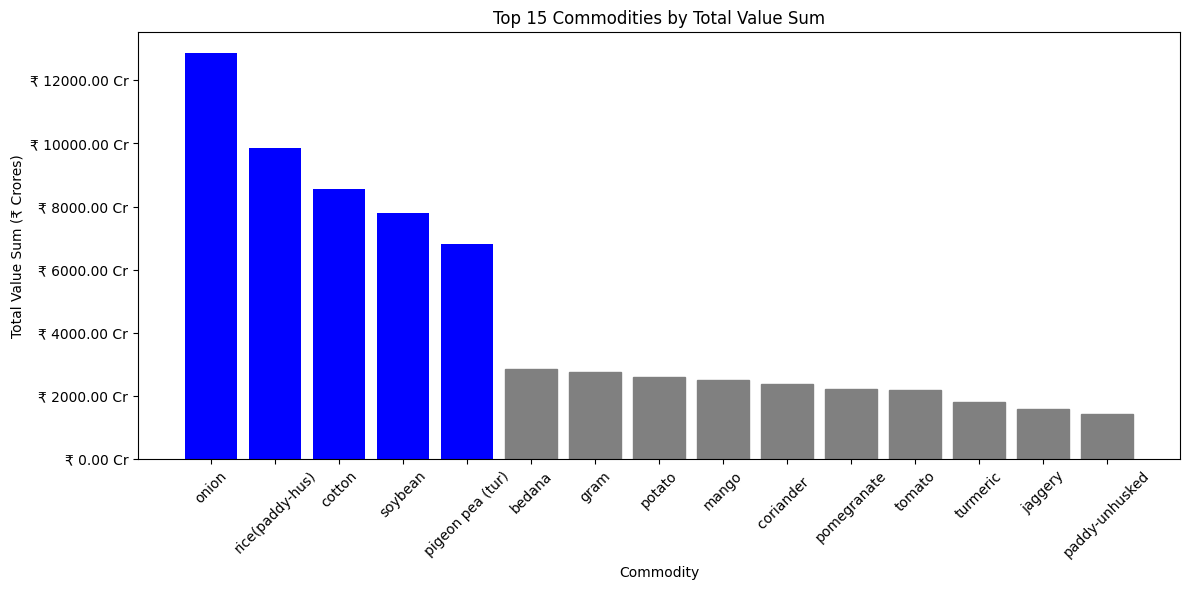

In [120]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Sort the DataFrame by 'Total Value Sum' in descending order and take the top 15
top_15_commodities = commodity_grouped.sort_values(by='Total Value Sum', ascending=False).head(15)

# Create a bar chart
plt.figure(figsize=(12, 6))

# Define colors for the bars
colors = ['grey' if i >= (len(top_15_commodities) - 10) else 'blue' for i in range(len(top_15_commodities))]

# Create the bar chart with custom colors
bars = plt.bar(top_15_commodities['Commodity'], top_15_commodities['Total Value Sum'], color=colors)

# Customize the chart
plt.xlabel('Commodity')
plt.ylabel('Total Value Sum (₹ Crores)')
plt.title('Top 15 Commodities by Total Value Sum')
plt.xticks(rotation=45)

# Format the y-axis labels in crores (₹)
formatter = ticker.FuncFormatter(lambda x, pos: f'₹ {x / 1e7:.2f} Cr')
plt.gca().yaxis.set_major_formatter(formatter)

# Set the color of the last 10 bars to grey
for i in range(len(top_15_commodities) - 10, len(top_15_commodities)):
    bars[i].set_color('grey')

# Show the chart
plt.tight_layout()
plt.show()

## This shows that Onion is the biggest contribution to the Industry when we consider Total Value. Therefore further analysis will be done specifically in onion

# Onion DF

In [142]:
# Filter rows where 'Commodity' is 'onion'
onion_df = crop_df[crop_df['Commodity'] == 'onion']

In [143]:
onion_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1872 entries, 31 to 62405
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   APMC             1872 non-null   object        
 1   Commodity        1872 non-null   object        
 2   Year             1872 non-null   int64         
 3   Month            1872 non-null   object        
 4   arrivals_in_qtl  1872 non-null   int64         
 5   min_price        1872 non-null   int64         
 6   max_price        1872 non-null   int64         
 7   modal_price      1872 non-null   int64         
 8   date             1872 non-null   datetime64[ns]
 9   district_name    1872 non-null   object        
 10  state_name       1872 non-null   object        
 11  Total Value      1872 non-null   int64         
dtypes: datetime64[ns](1), int64(6), object(5)
memory usage: 190.1+ KB


In [144]:
onion_df.shape

(1872, 12)

In [145]:
# Drop unwanted columns

# List of columns to drop
columns_to_drop = ['APMC', 'min_price', 'max_price', 'district_name', 'state_name', 'Total Value']

# Drop the specified columns
onion_df.drop(columns=columns_to_drop, inplace=True)

C:\Users\imaja\AppData\Local\Temp\ipykernel_5676\1859886153.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  onion_df.drop(columns=columns_to_drop, inplace=True)


In [146]:
# Group by 'date' and aggregate by summing 'modal_price' and 'arrivals_in_qtl'
aggregated_onion_df = onion_df.groupby('date').agg({'modal_price': 'sum', 'arrivals_in_qtl': 'sum'}).reset_index()

In [125]:
# Reset the index
onion_df.reset_index(drop=True, inplace=True)

In [147]:
aggregated_onion_df

,date,modal_price,arrivals_in_qtl
0,2014-09-01,82787,3107702
1,2014-10-01,81701,1958125
2,2014-11-01,74413,3034443
3,2014-12-01,78955,4725723
4,2015-01-01,72302,5172082
5,2015-02-01,75190,4897869
6,2015-03-01,63225,4406901
7,2015-04-01,60318,4947238
8,2015-05-01,65543,4292114
9,2015-06-01,97310,4125248


In [128]:
#Set index as date
onion_df.set_index('date', inplace=True)

In [129]:
onion_df

,Commodity,Year,Month,arrivals_in_qtl,modal_price
date,,,,,
2015-04-01,onion,2015,April,186700,797
2016-04-01,onion,2016,April,42342,538
2015-04-01,onion,2015,April,105645,849
2016-04-01,onion,2016,April,56372,662
2015-04-01,onion,2015,April,5232,788
...,...,...,...,...,...
2016-11-01,onion,2016,November,10681,898
2016-11-01,onion,2016,November,44746,656
2016-11-01,onion,2016,November,104720,788


In [132]:
onion_df["2015-04"]

C:\Users\imaja\AppData\Local\Temp\ipykernel_5676\2031831629.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  onion_df["2015-04"]


,Commodity,Year,Month,arrivals_in_qtl,modal_price
date,,,,,
2015-04-01,onion,2015,April,186700,797
2015-04-01,onion,2015,April,105645,849
2015-04-01,onion,2015,April,5232,788
2015-04-01,onion,2015,April,34179,988
2015-04-01,onion,2015,April,186038,977
...,...,...,...,...,...
2015-04-01,onion,2015,April,1741,775
2015-04-01,onion,2015,April,1508,1054
2015-04-01,onion,2015,April,305302,848


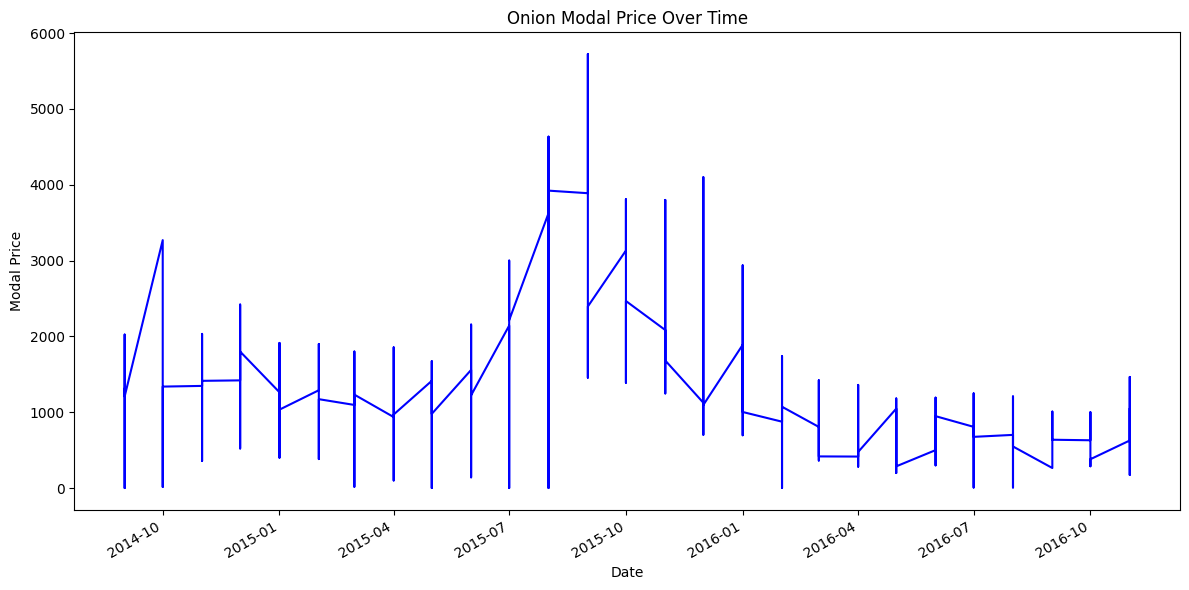

In [141]:
import matplotlib.pyplot as plt

# Plot 'modal_price' as a simple line graph
onion_df['modal_price'].plot(figsize=(12, 6), color='blue')

# Customize the chart
plt.xlabel('Date')
plt.ylabel('Modal Price')
plt.title('Onion Modal Price Over Time')

# Show the chart
plt.tight_layout()
plt.show()